<h1 style="text-align: center;"><b>Heston model simulations</b></h1>

### Maksim Sosnin, Roland Grinis, Ivan Novikov

Heston model is a stochastic volatility model for the forward dynamics in the risk neutral measure, and CIR dynamics for the variance:
$$
\left\{
\begin{array}{l}
    \text{d}X_t =  \sqrt{V_t} X_t \text{d}W_t^X,  \\
    \text{d}V_t =  \kappa (\theta - V_t)\text{d}t + \varepsilon \sqrt{V_t} \text{d} W_t^V,
\end{array}\right.
$$

where underlying Brownian motions are correlated:
$$ \text{d} W_t^V = \rho\text{d}W_t^X + \sqrt{1-\rho^2} \text{d}W_t,$$
$$ -1 < \rho < 1. $$

We can impose the Feller condition:
$$
2\kappa\theta > \varepsilon ^2
$$
to ensure that the variance $V_t$ stays strictly positive. For real markets, Feller condition is hardly satisfied. For continious time, this is not an issue, because at the moment the variance reaches 0, it will instantly go away from 0. For discretization is requires special consideration for different schemes.

# Heston Simulation

$$d \ln X(t) = -\frac{1}{2} V(t) dt + \sqrt{V(t)} d W_X(t),$$

$$d V(t) = \kappa(\theta-V(t)) dt + \varepsilon \sqrt{V(t)} d W_V(t),$$

$$d W_X(t) d W_V(t) = \rho dt.$$

### Euler Discretization Scheme

$$
\begin{aligned}
\ln \hat{X}(t+\Delta) & =\ln \hat{X}(t)-\frac{1}{2} \hat{V}(t) \Delta+\sqrt{\hat{V}(t)} Z_X \sqrt{\Delta}, \\
\hat{V}(t+\Delta) & =V(t)+\kappa(\theta-\hat{V}(t)) \Delta+\varepsilon \sqrt{\hat{V}(t)} Z_V \sqrt{\Delta},
\end{aligned}
$$

where $Z_X$ and $Z_V$ are standardized Gaussian variables with correlation $\rho$. So they can be computed as follows:

$$
\begin{array}{l}
    Z_V = \Phi^{-1}\left(U_1\right), \\
    Z_X = \rho Z_V+\sqrt{1-\rho^2} \Phi^{-1}\left(U_2\right),
\end{array}
$$

where $U_1$ and $U_2$ are independent uniform samples, and $Φ^{−1}$ is the inverse cumulative Gaussian distribution function.

However, the discrete process for $V$ can become negative with non-zero probability, which in turn would make computation of $\sqrt{\hat{V}}$ impossible and cause the time-stepping scheme to fail. The scheme that appears to produce the smallest discretization bias can be written on the form:

$$
\begin{aligned}
\ln \hat{X}(t+\Delta) & =\ln \hat{X}(t)-\frac{1}{2} \hat{V}(t)^{+} \Delta+\sqrt{\hat{V}(t)^{+}} Z_X \sqrt{\Delta} \\
\hat{V}(t+\Delta) & =\hat{V}(t)+\kappa\left(\theta-\hat{V}(t)^{+}\right) \Delta+\varepsilon \sqrt{\hat{V}(t)^{+}} Z_V \sqrt{\Delta},
\end{aligned}
$$
where we use the notation $x^{+}=\max (x, 0)$.

### Bias free Scheme

To obtain a bias-free scheme for sampling the asset price process, first integrate the SDE for $V(t)$, to yield
$$
V(t+\Delta)=V(t)+\int_t^{t+\Delta} \kappa(\theta-V(u)) d u+\varepsilon \int_t^{t+\Delta} \sqrt{V(u)} d W_V(u)
$$
or, equivalently,
$$
\int_t^{t+\Delta} \sqrt{V(u)} d W_V(u)=\varepsilon^{-1}\left(V(t+\Delta)-V(t)-\kappa \theta \Delta+\kappa \int_t^{t+\Delta} V(u) d u\right)
$$
A Cholesky decomposition shows that
$$
d \ln X(t)=-\frac{1}{2} V(t) d t+\rho \sqrt{V(u)} d W_V(u)+\sqrt{1-\rho^2} \sqrt{V(u)} d W(u)
$$
where $W$ is a Brownian motion independent of $W_V$. In integral form,
$$
\begin{aligned}
\ln X(t+\Delta)=\ln X(t)+\frac{\rho}{\varepsilon} & (V(t+\Delta)-V(t)-\kappa \theta \Delta) \\
& +\left(\frac{\kappa \rho}{\varepsilon}-\frac{1}{2}\right) \int_t^{t+\Delta} V(u) d u+\sqrt{1-\rho^2} \int_t^{t+\Delta} \sqrt{V(u)} d W(u)
\end{aligned}
$$

As $W$ is independent of $V$, conditional on $V(t)$ and $\int_t^{t+\Delta} V(u) d u$, the Ito integral $\int_t^{t+\Delta} \sqrt{V(u)} d W(u)$ is Gaussian with mean zero and variance $\int_t^{t+\Delta} V(u) d u$.

### Process for $V$ (CIR)

Non-central chi-squared distribution:
$$
\mathbb{P}\left(V_{t + \Delta}<V \mid V_{t}\right) \quad = \quad F_{\chi'^{2}}\left(\frac{4 \kappa V}{\varepsilon^{2}\left(1-e^{-\kappa \Delta}\right)} ; \frac{4 \kappa \theta}{\varepsilon^{2}}, \frac{4 V_{t} \kappa e^{-\kappa \Delta}}{\varepsilon^{2}\left(1-e^{-\kappa \Delta}\right)}\right) \quad
$$


$$
\begin{aligned}
m = \mathbb{E}\left( V_{t+\Delta} \mid V_t \right) \quad & = \quad \theta+(\hat{V}(t)-\theta) e^{-\kappa \Delta} \\
s^2 = Var\left( V_{t+\Delta} \mid V_t \right) \quad & = \quad \frac{\hat{V}(t) \varepsilon^2 e^{-\kappa \Delta}}{\kappa}\left(1-e^{-\kappa \Delta}\right)+\frac{\theta \varepsilon^2}{2 \kappa}\left(1-e^{-\kappa \Delta}\right)^2
\end{aligned}
$$


### Quadratic exponential (QE) approximation

Switching rule:
- $ V_t \gg 1: \quad V_{t+\Delta} \approx a \left( b + Z_V \right)^2,\quad \text{where } Z_V \sim \mathcal{N}(0,1).$
- $V_t \ll 1: \quad f_{V_{t+\Delta}}(v) \approx p \delta(v) + \beta(1-\rho) e^{-\beta v}.$

Fast sampling for PDF $f_{V_{t+\Delta}}(v)$:
$$
\begin{aligned}
F_{V_{t+\Delta}}^{-1}(u) & \approx\left\{
    \begin{array}{l}
        0,\ \ 0 \leq u \leq p, \\
        \beta^{-1} \ln \left(\frac{1-p}{1-u}\right),\ \ p \leq u \leq 1,
    \end{array}\right. \\
\end{aligned}
$$
where $u \sim \mathcal{U}[0,1]$ – uniform.

### Generating random numbers

Pseudo-random integers:
$$
0 \leq N_k \leq N, \quad \quad N_{k+1} = f(N_k) \equiv N
$$

$$
u \sim \mathcal{U}[0,1], \quad \quad u_k = \frac{N_k}{N}.
$$

Box-Muller method:
$$ u_1 u_2 \sim \mathcal{U}[0,1] \quad \theta = 2\pi u_2 \quad p = \sqrt{-2 \ln{u_1}} $$

$$ Z_1 = p\cos{\theta} $$
$$ Z_2 = p\sin{\theta} $$
Then $Z_1$ and $Z_2$ are independent random variables with a standard normal distribution $\mathcal{N}(0,1).$


### Computing parameters $(a,\ b,\ p,\ \beta)$

$\psi \equiv \frac{S^{2}}{m^{2}} \quad \text { if } \psi \leqslant 2$:
$$
\begin{array}{l}
b^{2}=2 \psi^{-1}-1+\sqrt{2 \psi^{-1}} \sqrt{2 \psi^{-1}-1} \geq 0 \\
a=\frac{m}{1+b^{2}} \\
\implies \text {2nd moment matches.}
\end{array}
$$

if $\psi \geqslant 1$:
$$
\begin{array}{l}
p=\frac{\psi-1}{\psi+2} \in[0,1) \\
\beta=\frac{1-p}{m}=\frac{2}{m(1+\psi)} \\
\implies \text {moment matching at order 2.}
\end{array}
$$

Switching rule: $\psi_{c} \in [1,2]$, e.g. $\psi = 1.5$.

### Moment matching technique

$$
\begin{array}{l}
Y_{t_{j+1}}^{k}=\hat{V}_{t_{j+1}}^{k}-\hat{V}_{t_{j}}^{k}, \quad \Delta_{j}=t_{j+1}-t_{j}, \quad \hat{V}_{t_{N}}^{k}=\sum_{j=1}^{N} \hat{Y}_{t_{j}}^{k} \\
\Delta=t_{N}-t_{0} ; \quad k=1, \ldots, M \\
\hat{m}_{T}=\frac{1}{M} \sum_{k} \hat{V}_{t_{N}}^{k} \\
\hat{S}_{T}^{2}=\frac{1}{M-1} \sum_{k}\left(\hat{V}_{t_{N}}^{k}-\hat{m}\right)^{2}
\end{array}
$$

$$
\begin{array}{l}
\hat{m}_{T} = M_T \quad \quad m_T = \mathbb{E}[V_T \mid V_{t_0}] \\
\hat{S}^{2}_T = S^{2}_T \quad \quad S^{2}_T = Var[V_T \mid V_{t_0}] \\
\implies V^{k}_T = m_T + \frac{S_T}{\hat{S}_T} (\hat{V}^{k}_T - \hat{m}_T) = \sum_{j=1}^{N} \left(\frac{m_T}{N} + \frac{S_T}{\hat{S}_T} \left(\hat{Y}^{k}_{t_j} - \frac{m_T}{N}\right)\right).
\end{array}
$$


### Simulating $\ln{X_{t+\Delta}}$

Euler Scheme for $\ln{X_{t+\Delta}}$ with QE sampling for $V_{t+\Delta}$ leads to **correlation leaks**.

We use approximation
$$
\begin{array}{l}
 \int_{t}^{t+\Delta} V_{u} d u \approx \Delta \left[\gamma_{1}V_{t} + \gamma_{2}V_{t+\Delta}\right],
\end{array}
$$
where

$$
\begin{array}{l}
    \gamma_{1} + \gamma_{2} = 1 \\
    \gamma_{1}, \gamma_{2} \geq 0,
\end{array}
$$

satisfying the regularity condition:
$$
\mathbb{E}\left(X_{t + \Delta} \mid X_{t}\right)<\infty \Longrightarrow \frac{\rho}{\varepsilon}\left(1+\kappa \gamma_{2} \Delta\right)-\frac{1}{2} \gamma_{2} \Delta \rho^{2}<\frac{2 \kappa}{\varepsilon^{2} (1-e^{-\kappa \Delta})}.
$$

We use discretization scheme
$$
\begin{aligned}
\ln \hat{X}(t+\Delta)= & \ln \hat{X}(t) + \frac{\rho}{\varepsilon} \left( \hat{V}(t+\Delta) - \hat{V}(t)-\kappa \theta \Delta \right)+\Delta\left(\frac{\kappa \rho}{\varepsilon}-\frac{1}{2}\right)\left(\gamma_1 \hat{V}(t)+\gamma_2 \hat{V}(t+\Delta)\right) \\
& +\sqrt{\Delta} \sqrt{1-\rho^2} \sqrt{\gamma_1 \hat{V}(t)+\gamma_2 \hat{V}(t+\Delta)} \cdot Z \\
= & \ln \hat{X}(t)+K_0+K_1 \hat{V}(t)+K_2 \hat{V}(t+\Delta)+\sqrt{K_3 \hat{V}(t)+K_4 \hat{V}(t+\Delta)} \cdot Z,
\end{aligned}
$$
where $Z$ is a standard Gaussian random variable, independent of $\hat{V}$, and $K_0, \ldots, K_4$ are given by
$$
\begin{aligned}
& K_0=-\frac{\rho \kappa \theta}{\varepsilon} \Delta, \quad K_1=\gamma_1 \Delta\left(\frac{\kappa \rho}{\varepsilon}-\frac{1}{2}\right)-\frac{\rho}{\varepsilon}, \\
& K_2=\gamma_2 \Delta\left(\frac{\kappa \rho}{\varepsilon}-\frac{1}{2}\right)+\frac{\rho}{\varepsilon}, \quad K_3=\gamma_1 \Delta\left(1-\rho^2\right), \quad K_4=\gamma_2 \Delta\left(1-\rho^2\right) .
\end{aligned}
$$

If we add drift to the Heston model:
$$
    \text{d}X_t = \mu X_t \text{d}t + \sqrt{V_t} X_t \text{d}W_t^X,  \\
$$

the term $\mu \Delta$ is added to $\ln \hat{X}(t+\Delta)$.


### Enforcing Martingale property $\mathbb{E}\left(X_{t+\Delta} \mid X_{t}\right)=X_{t} $
Instead of $K_0$, use

$$
\begin{array}{l}
K_{0}^{*} = \left\{
    \begin{array}{l}
        -\frac{A b^{2} a}{1-2 A a}+\frac{1}{2} \ln (1-2 A a)-\left(K_{1}+\frac{1}{2} \Delta \gamma_1\right), \quad \psi \leq \psi_{c} \\
        -\ln \left(\frac{\beta(1-\rho)}{\beta-A}\right)-\left(K_{1}+\frac{1}{2} \Delta \gamma_{1}\right), \quad \psi > \psi_{c}, \\
    \end{array}\right.
\end{array}
$$

where

$$
A=\frac{\rho}{\varepsilon^{2}}\left(1+\kappa \gamma_{2} \Delta\right)-\frac{1}{2} \gamma_{2} \Delta\rho^{2}.
$$

### Variance reduction: antithetic variates

$$
\begin{array}{l}
u \sim \mathcal{U}(0,1) \longrightarrow 1-u \sim \mathcal{U}(0,1) \longrightarrow \hat{V}=\mathbb{E}\left[P\left(V_{T}\right)\right] \\
Z \sim \mathcal{N}(0,1) \longrightarrow-Z \sim \mathcal{N}(0,1) \longrightarrow V^{-} \\
V_{A V}=\frac{1}{2}\left(\hat{V}+V^{-}\right) \\
\operatorname{Var}\left[V_{A V}\right]=\frac{1}{4} \operatorname{Var}\left[\hat{V}+V^{-}\right]=\frac{1}{4} \operatorname{Var} \hat{V}+\frac{1}{4} \operatorname{Var} V^{-}+\frac{1}{2} \operatorname{Cov}\left(\hat{V}, V^{-}\right) \\
\left|\operatorname{cov}\left(\hat{V}, V^{-}\right)\right| \leqslant \frac{1}{2} \operatorname{Var} \hat{V}+\frac{1}{2} \operatorname{Var} V^{-} \Rightarrow \\
 \Rightarrow \operatorname{Var V}_{A V} \leqslant \operatorname{Var} \hat{V} \text{ - negative correlation effect for antithetics}
\end{array}
$$

### Variance reduction: control variates
$$
\begin{array}{l}
\hat{V} = \mathbb{E}[P(V_T)] \\
\text{C – analytic formula (like a vanilla call)} \\
\hat{C} = \mathbb{E}[P_C(V_T)] \\
V = \hat{V} + \alpha (C - \hat{C}) \\
\end{array}
$$


---

We provide two identical implementations in Python and C++. Throughout this notebook we will use the Python implementation.

The C++ source code is located in `src/noa/quant/heston_sim.hh` and can be loaded as a pytorch extension.

In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.auto import tqdm

from pyquant.heston_sim import *
from pyquant.heston import *
from pyquant.common import *

pd.set_option('display.expand_frame_repr', False)
pd.set_option("display.precision", 3)

In [2]:
KAPPA = torch.tensor([1.2], dtype=torch.double)
THETA = torch.tensor([0.066], dtype=torch.double)
EPS   = torch.tensor([0.592], dtype=torch.double)
RHO   = torch.tensor([-0.65], dtype=torch.double)

RATE = torch.tensor([0.03], dtype=torch.double)

S0 = torch.tensor([100], requires_grad=True, dtype=torch.double)
V0 = torch.tensor([0.066], requires_grad=True, dtype=torch.double)

N_PATHS = 2_000_000
DT = 45 / 365  # later we will use maturities with step 45/365
N_STEPS = round(1/DT * 1.47945)  # latest maturity we will have is 1.47945

In [3]:
print(f'DT: {DT}')
print(f'N_STEPS: {N_STEPS}')

DT: 0.1232876712328767
N_STEPS: 12


In [4]:
print('Feller condition (2κθ > ε²) satisfied:', (2 * KAPPA * THETA > EPS ** 2).item())
print('2κθ =', (2 * KAPPA * THETA).item())
print('ε² =', (EPS ** 2).item())

Feller condition (2κθ > ε²) satisfied: False
2κθ = 0.1584
ε² = 0.35046399999999994


# Heston and CIR process simulation

In [5]:
N_PATHS_EXAMPLE = 10
DT_EXAMPLE = 1/365
N_STEPS_EXAMPLE = round(1/DT_EXAMPLE) * 2  # 2 years

init_state_price = S0 * torch.ones(N_PATHS_EXAMPLE, dtype=torch.double)
init_state_var = V0 * torch.ones(N_PATHS_EXAMPLE, dtype=torch.double)
heston_paths, var_paths = generate_heston(
    N_PATHS_EXAMPLE, N_STEPS_EXAMPLE, DT_EXAMPLE, init_state_price, init_state_var,
    KAPPA, THETA, EPS, RHO, RATE)

In [6]:
def plot_heston(i):
    time = torch.linspace(0, N_STEPS_EXAMPLE * DT_EXAMPLE, N_STEPS_EXAMPLE + 1)
    plt.plot(time, heston_paths[i].detach().numpy())
    plt.ylabel('S')
    plt.xlabel('Time')
    plt.show()

    plt.plot(time, var_paths[i].detach().numpy())
    plt.axhline(THETA.item(), ls='--', label='θ', lw=1, c='darkred')
    plt.ylabel('Variance (CIR process)')
    plt.xlabel('Time')
    plt.legend()
    plt.show()

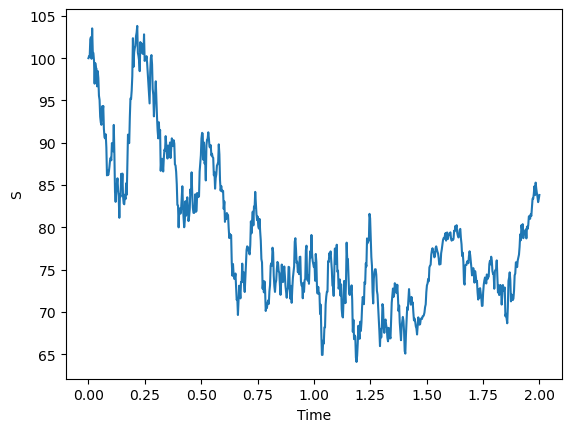

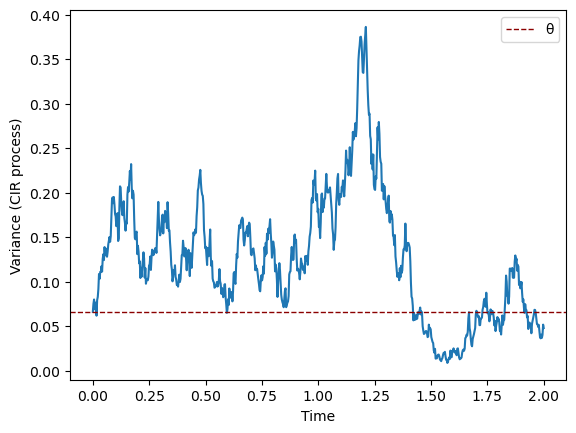

In [7]:
plot_heston(0)


For further usage, let's generate more trajectories but with bigger time step. This time we will set the value of `minimum_var` parameter of `generate_heston()` function in order to compute the vega Greek with automatic differentiation (autograd) later on.

In [8]:
init_state_price = S0 * torch.ones(N_PATHS, dtype=torch.double)
init_state_var = V0 * torch.ones(N_PATHS, dtype=torch.double)
heston_paths, var_paths = generate_heston(
    N_PATHS, N_STEPS, DT, init_state_price, init_state_var,
    KAPPA, THETA, EPS, RHO, RATE, minimum_var=0.005)

# Monte-Carlo pricing of European options

By the principle of risk-neutral valuation, the present value of a derivative contract with possibly path-dependent payoff $\mathcal{P}$ is given by discounted expectation of the payoff:

$$
V(S_0, 0) = e^{-rT} \cdot \mathbb{E}_Q[\mathcal{P}\, |\, S_t\ \text{starting from}\ S_0],
$$

where $S_t$ is the price of the underlying asset at time $t$, $V(S_t, t)$ is the value of a contract, $\mathbb{E}_Q$ is the expectation under a risk-neutral measure (see `introduction.ipynb`, section "Risk Neutral Valuation").

The idea of Monte-Carlo pricing is to simulate a big number of paths of the underlying asset and estimate $\mathbb{E}_Q$ as the mean of the payoffs.

We use PyTorch for all mathematical operations in simulation algorithm, so we can in fact apply autograd to the calculated price in order to compute the Greeks for arbitrary derivatives. We will demonstrate this in the following sections.

In [9]:
time_arr = np.linspace(0, N_STEPS * DT, N_STEPS + 1)

In [10]:
# list of strikes from code in supplementary materials to [Cui2017]
strike_arr = [
    0.6137, 0.6699, 0.7216, 0.7470, 0.7760, 0.8112, 0.8603, 0.9025,
    0.9175, 0.9358, 0.9371, 0.9464, 0.9588, 0.9728, 0.9868, 0.9956,
    1.0427, 1.0463, 1.0499, 1.0530, 1.0562, 1.0593, 1.0663, 1.0766,
    1.2287, 1.2399, 1.2485, 1.2659, 1.2646, 1.2715, 1.2859, 1.3046,
    1.3939, 1.4102, 1.4291, 1.4456, 1.4603, 1.4736, 1.5005, 1.5328]
strike_arr = [k * S0.item() for k in strike_arr]

# list of maturities
maturity_arr = 5 * [x / 365 for x in [45., 90., 135., 180., 225., 270., 405., 540.]]

assert len(strike_arr) == len(maturity_arr)

## Vanilla Call Option

In [11]:
def call_payoff(S, K):
    return torch.maximum(S - K, torch.zeros_like(S))

In [12]:
euro_prices_mc = []
euro_deltas_autograd = []
euro_vegas_autograd = []

for i in tqdm(range(len(strike_arr))):
    expiry_idx = np.argmin(np.abs(time_arr - maturity_arr[i]))
    T_actual = DT * expiry_idx
    price = torch.exp(-RATE * T_actual) * call_payoff(heston_paths[:, expiry_idx], strike_arr[i]).mean()
    delta, vega = torch.autograd.grad(price, [S0, V0], retain_graph=True)
    
    euro_prices_mc.append(price.item())
    euro_deltas_autograd.append(delta.item())
    euro_vegas_autograd.append(vega.item())

  0%|          | 0/40 [00:00<?, ?it/s]

Here we list the calculated prices and greeks. We also compare the Monte-Carlo prices to the prices computed with the analytical method from [Cui2017].

In [13]:
heston_params = HestonParams(
    Variance(V0.item()),
    VarReversion(KAPPA.item()),
    AverageVar(THETA.item()),
    VolOfVar(EPS.item()),
    Correlation(RHO.item())
)

heston_calc = HestonCalc(heston_params)

euro_prices_analytic = heston_calc.premiums(
    Spot(S0.item()),
    TimesToMaturity(np.array(maturity_arr)),
    Strikes(np.array(strike_arr)),
    OptionTypes(np.full(len(strike_arr), True)),
    ForwardYield(RATE.item())
).data

market_params = MarketParams(
    Spot(S0.item()),
    ForwardYield(RATE.item()),
    TimesToMaturity(np.array(maturity_arr)),
    Strikes(np.array(strike_arr)),
    OptionTypes(np.full(len(strike_arr), True)),
    Premiums(np.full(len(strike_arr), np.nan))
)

In [14]:
relat_diff = (np.array(euro_prices_mc) - euro_prices_analytic) / np.abs(euro_prices_analytic)
table_vanilla = pd.DataFrame({
    'Maturity': maturity_arr, 'Strike': strike_arr, 'Price MC': euro_prices_mc,
    'Price analyt.': euro_prices_analytic, 'Price rel. diff, %': relat_diff * 100,
    'Delta': euro_deltas_autograd, 'Vega': euro_vegas_autograd
})

print(f'κ = {KAPPA.item()}, θ = {THETA.item()}, ε = {EPS.item()},'
      f'ρ = {RHO.item()}, rate = {RATE.item()}')
print(f'S₀ = {S0.item()}\n')
print('======== In the money =========\n')
for i in range(5):
    print(table_vanilla.iloc[i * 8: (i + 1) * 8], end='\n\n')
    if i == 1:
        print('======= Out of the money =======\n')

κ = 1.2, θ = 0.066, ε = 0.592,ρ = -0.65, rate = 0.03
S₀ = 100.0

======== In the money =========

   Maturity  Strike  Price MC  Price analyt.  Price rel. diff, %  Delta    Vega
0     0.123   61.37    38.832         38.857              -0.065  1.000   0.608
1     0.247   66.99    33.478         33.563              -0.252  0.993   3.114
2     0.370   72.16    28.824         29.000              -0.609  0.971   8.816
3     0.493   74.70    26.909         27.189              -1.032  0.949  14.237
4     0.616   77.60    24.811         25.195              -1.523  0.925  19.753
5     0.740   81.12    22.343         22.813              -2.061  0.896  25.386
6     1.110   86.03    20.049         20.764              -3.448  0.842  32.355
7     1.479   90.25    18.597         19.483              -4.549  0.794  34.843

    Maturity  Strike  Price MC  Price analyt.  Price rel. diff, %  Delta    Vega
8      0.123   91.75     9.492          9.525              -0.343  0.862  14.960
9      0.247   93.5

The prices calculated by Monte-Carlo method are generally very close to the analytical values. The precision can be further improved by increasing the number of simulated paths.

## Barrier Options

Barrier options have the following payoffs:
$$\text{UpIn Call}_T = \max[S_T - K,\ 0] \cdot 1_{\left\{ \max_{t\in[0, T]}[S(t)]\ \geq\ B \right\}},$$

$$\text{UpIn Put}_T = \max[K - S_T,\ 0] \cdot 1_{\left\{ \max_{t\in[0, T]}[S(t)]\ \geq\ B \right\}},$$

$$\text{UpOut Call}_T = \max[S_T - K,\ 0] \cdot 1_{\left\{ \max_{t\in[0, T]}[S(t)]\ <\ B \right\}},$$

$$\text{UpOut Put}_T = \max[K - S_T,\ 0] \cdot 1_{\left\{ \max_{t\in[0, T]}[S(t)]\ <\ B \right\}},$$

$$\text{DownIn Call}_T = \max[S_T - K,\ 0] \cdot 1_{\left\{ \min_{t\in[0, T]}[S(t)]\ \leq\ B \right\}},$$

$$\text{DownIn Put}_T = \max[K - S_T,\ 0] \cdot 1_{\left\{ \min_{t\in[0, T]}[S(t)]\ \leq\ B \right\}},$$

$$\text{DownOut Call}_T = \max[S_T - K,\ 0] \cdot 1_{\left\{ \min_{t\in[0, T]}[S(t)]\ >\ B \right\}},$$

$$\text{DownOut Put}_T = \max[K - S_T,\ 0] \cdot 1_{\left\{ \min_{t\in[0, T]}[S(t)]\ >\ B \right\}},$$

where $S$ – price of the underlying, $T$ – maturity, $K$ – strike, $B$ – barrier. See [review of barrier options](https://bookdown.org/maxime_debellefroid/MyBook/barrier-options.html).


In [15]:
from pyquant.barrier import price_barrier_option

In [16]:
strike_arr_up = torch.tensor(strike_arr[16:24], dtype=torch.double)
strike_arr_down = torch.tensor(strike_arr[8:16], dtype=torch.double)
maturity_arr_up = torch.tensor(maturity_arr[16:24], dtype=torch.double)
maturity_arr_down = torch.tensor(maturity_arr[8:16], dtype=torch.double)

prices_vanilla_itm = table_vanilla['Price MC'][8:16]
prices_vanilla_otm = table_vanilla['Price MC'][16:24]

barriers_up_in = torch.tensor([K + (K-S0)*3 for K in strike_arr_up], dtype=torch.double)
barriers_up_out = torch.tensor([K + (K-S0)*4 for K in strike_arr_up], dtype=torch.double)
barriers_down_in = torch.tensor([95., 95., 94., 94., 94., 93., 92., 92.], dtype=torch.double)
barriers_down_out = torch.tensor([95., 95., 94., 94., 94., 93., 92., 92.], dtype=torch.double)

prices_up_in, prices_up_out, prices_down_in, prices_down_out = [], [], [], []
deltas_up_in, deltas_up_out, deltas_down_in, deltas_down_out = [], [], [], []
vegas_up_in, vegas_up_out, vegas_down_in, vegas_down_out = [], [], [], []

# Up-and-In
for i in tqdm(range(len(barriers_up_in))):
    expiry_idx = np.argmin(np.abs(time_arr - maturity_arr_up[i].item()))
    price = price_barrier_option(
        heston_paths[:, :expiry_idx+1],
        strike_arr_up[i],
        maturity_arr_up[i],
        RATE,
        barrier=barriers_up_in[i],
        barrier_type='up-in',
        call=True)
    delta, vega = torch.autograd.grad(price, [S0, V0], retain_graph=True)
    deltas_up_in.append(delta.item())
    vegas_up_in.append(vega.item())
    prices_up_in.append(price.item())

# Up-and-Out
for i in tqdm(range(len(barriers_up_out))):
    expiry_idx = np.argmin(np.abs(time_arr - maturity_arr_up[i].item()))
    price = price_barrier_option(
        heston_paths[:, :expiry_idx+1],
        strike_arr_up[i],
        maturity_arr_up[i],
        RATE,
        barrier=barriers_up_out[i],
        barrier_type='up-out',
        call=True)
    delta, vega = torch.autograd.grad(price, [S0, V0], retain_graph=True)
    deltas_up_out.append(delta.item())
    vegas_up_out.append(vega.item())
    prices_up_out.append(price.item())

# Down-and-In
for i in tqdm(range(len(barriers_down_in))):
    expiry_idx = np.argmin(np.abs(time_arr - maturity_arr_down[i].item()))
    price = price_barrier_option(
        heston_paths[:, :expiry_idx+1],
        strike_arr_down[i],
        maturity_arr_down[i],
        RATE,
        barrier=barriers_down_in[i],
        barrier_type='down-in',
        call=True)
    delta, vega = torch.autograd.grad(price, [S0, V0], retain_graph=True)
    deltas_down_in.append(delta.item())
    vegas_down_in.append(vega.item())
    prices_down_in.append(price.item())

# Down-and-Out
for i in tqdm(range(len(barriers_down_out))):
    expiry_idx = np.argmin(np.abs(time_arr - maturity_arr_down[i].item()))
    price = price_barrier_option(
        heston_paths[:, :expiry_idx+1],
        strike_arr_down[i],
        maturity_arr_down[i],
        RATE,
        barrier=barriers_down_out[i],
        barrier_type='down-out',
        call=True)
    delta, vega = torch.autograd.grad(price, [S0, V0], retain_graph=True)
    deltas_down_out.append(delta.item())
    vegas_down_out.append(vega.item())
    prices_down_out.append(price.item())

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [17]:
table_up_in = pd.DataFrame({
    'Maturity': maturity_arr_up, 'Strike': strike_arr_up,
    'Barrier': barriers_up_in, 'Price': prices_up_in,
    'Vanilla price': prices_vanilla_otm,
    'Delta': deltas_up_in, 'Vega': vegas_up_in
}).reset_index(drop=True)

table_up_out = pd.DataFrame({
    'Maturity': maturity_arr_up, 'Strike': strike_arr_up,
    'Barrier': barriers_up_out, 'Price': prices_up_out,
    'Vanilla price': prices_vanilla_otm,
    'Delta': deltas_up_out, 'Vega': vegas_up_out
}).reset_index(drop=True)

table_down_in = pd.DataFrame({
    'Maturity': maturity_arr_down, 'Strike': strike_arr_down,
    'Barrier': barriers_down_in, 'Price': prices_down_in,
    'Vanilla price': prices_vanilla_itm,
    'Delta': deltas_down_in, 'Vega': vegas_down_in
}).reset_index(drop=True)

table_down_out = pd.DataFrame({
    'Maturity': maturity_arr_down, 'Strike': strike_arr_down,
    'Barrier': barriers_down_out, 'Price': prices_down_out,
    'Vanilla price': prices_vanilla_itm,
    'Delta': deltas_down_out, 'Vega': vegas_down_out
}).reset_index(drop=True)

print(f'κ = {KAPPA.item()}, θ = {THETA.item()}, ε = {EPS.item()}, ρ = {RHO.item()}, rate = {RATE.item()}')
print(f'S₀ = {S0.item()}\n')
print('===================== Up-and-In Call ======================\n')
print(table_up_in)
print('\n=================== Up-and-Out Call =======================\n')
print(table_up_out)
print('\n=================== Down-and-In Call ======================\n')
print(table_down_in)
print('\n=================== Down-and-Out Call =====================\n')
print(table_down_out)

κ = 1.2, θ = 0.066, ε = 0.592, ρ = -0.65, rate = 0.03
S₀ = 100.0

===================== Up-and-In Call ======================

   Maturity  Strike  Barrier  Price  Vanilla price  Delta    Vega
0     0.123  104.27   117.08  0.263          1.759  0.020   2.878
1     0.247  104.63   118.52  0.963          2.913  0.066   9.429
2     0.370  104.99   119.96  1.635          3.771  0.103  14.674
3     0.493  105.30   121.20  2.278          4.508  0.135  18.899
4     0.616  105.62   122.48  2.849          5.158  0.160  21.905
5     0.740  105.93   123.72  3.384          5.754  0.181  24.201
6     1.110  106.63   126.52  5.034          7.415  0.242  29.385
7     1.479  107.66   130.64  6.163          8.736  0.265  30.131

=================== Up-and-Out Call =======================

   Maturity  Strike  Barrier  Price  Vanilla price  Delta    Vega
0     0.123  104.27   121.35  1.693          1.759  0.374  24.204
1     0.247  104.63   123.15  2.475          2.913  0.424  30.656
2     0.370  104.99

We can see that barrier options have lower prices than the similar vanilla options. That's because they carry an additional risk to expire worthless.

# References

* [Andersen2007] [Andersen, L.B., 2007. Efficient simulation of the Heston stochastic volatility model. Available at SSRN 946405.](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=946405)
* [Grzelak2019] Grzelak, L.A. et al. *Mathematical Modeling and Computation in Finance: With Exercises and Python and MATLAB Computer Codes*, World Scientific Pub. (2019)
* [Cui2017] [Cui, Y. et al. *Full and fast calibration of the Heston stochastic volatility model.* European Journal of Operational Research 263.2 (2017)](https://www.sciencedirect.com/science/article/pii/S0377221717304460)
* [Online book about derivatives by Maxime de Bellefroid](https://bookdown.org/maxime_debellefroid/MyBook/)